In [1]:
from qiskit import QuantumRegister, QuantumCircuit
import sys

if not '../' in sys.path:
    sys.path.insert(1, '../')

In [2]:
from helperfunctions.graphhelper import node_attr, edge_attr
from helperfunctions.circuitgraphfunctions import get_computation_graph
from helperfunctions.uncompfunctions import add_uncomputation

from rustworkx.visualization import graphviz_draw

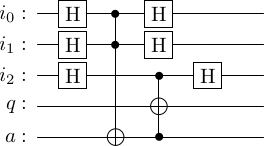

In [3]:
circ = QuantumCircuit(QuantumRegister(3,'i'), QuantumRegister(1,'q'), QuantumRegister(1,'a'))
for i in range(3):
    circ.h(i)
circ.ccx(0,1,4)
circ.ccx(2,4,3)
# circ.barrier()
for i in range(3):
    circ.h(i)

circ.draw('latex', plot_barriers=False)

Adding Nodes for Circuit: 100%|██████████| 8/8 [00:00<00:00, 63550.06it/s]


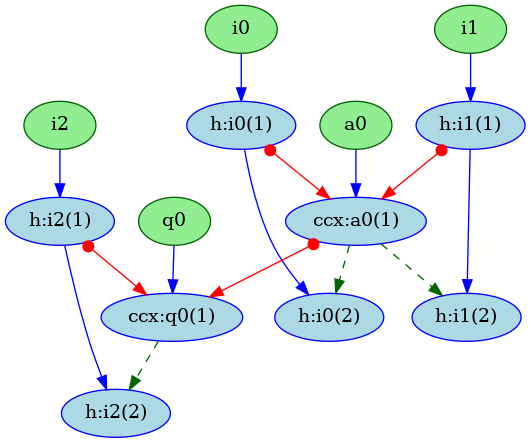

In [4]:
anc = ['a0', 'a1']
cg = get_computation_graph(circ, anc)
graphviz_draw(cg, node_attr_fn=node_attr, edge_attr_fn=edge_attr, method='dot')

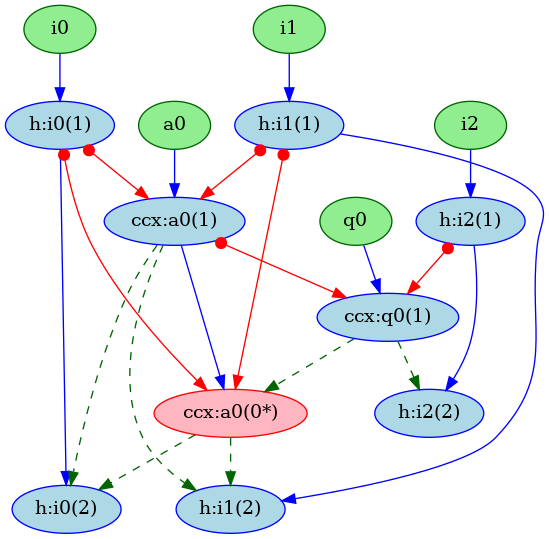

In [5]:
ucg, cycle = add_uncomputation(cg, anc)
if cycle:
    print(f'UCG HAS CYCLE??')
graphviz_draw(ucg, node_attr_fn=node_attr, edge_attr_fn=edge_attr, method='dot')

In [6]:
for nodelist in ucg.edge_list():
    print(nodelist)

(0, 5)
(1, 6)
(2, 7)
(4, 8)
(5, 8)
(6, 8)
(3, 9)
(7, 9)
(8, 9)
(5, 10)
(8, 10)
(6, 11)
(8, 11)
(7, 12)
(9, 12)
(8, 13)
(6, 13)
(13, 11)
(5, 13)
(13, 10)
(9, 13)


In [7]:
for nodes in ucg.nodes():
    print(nodes)

CGNode: Labeled i0 @ index: 0 of type input is a initialize node.
CGNode: Labeled i1 @ index: 1 of type input is a initialize node.
CGNode: Labeled i2 @ index: 2 of type input is a initialize node.
CGNode: Labeled q0 @ index: 3 of type input is a initialize node.
CGNode: Labeled a0 @ index: 4 of type ancilla is a initialize node.
CGNode: Labeled i0 @ index: 5 of type input is a computation node.
CGNode: Labeled i1 @ index: 6 of type input is a computation node.
CGNode: Labeled i2 @ index: 7 of type input is a computation node.
CGNode: Labeled a0 @ index: 8 of type ancilla is a computation node.
CGNode: Labeled q0 @ index: 9 of type input is a computation node.
CGNode: Labeled i0 @ index: 10 of type input is a computation node.
CGNode: Labeled i1 @ index: 11 of type input is a computation node.
CGNode: Labeled i2 @ index: 12 of type input is a computation node.
CGNode: Labeled a0 @ index: 13 of type ancilla is a uncomputation node.
